In [14]:
# Import essential libraries for quantum computation
import numpy as np
print("NumPy version:", np.__version__)

# Enable automatic reloading of modules
%load_ext autoreload
%autoreload 0

print("Jupyter environment initialized for quantum chemistry calculations")

from IPython.display import display, Markdown
display(Markdown('''
**Note:** This notebook relies on NumPy for numerical operations and the autoreload extension to
help with module development. The `autoreload 0` setting means no modules will be automatically reloaded.
'''))

NumPy version: 2.2.5
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Jupyter environment initialized for quantum chemistry calculations



**Note:** This notebook relies on NumPy for numerical operations and the autoreload extension to
help with module development. The `autoreload 0` setting means no modules will be automatically reloaded.


Notebook by **Maxime Dion** <maxime.dion@usherbrooke.ca><br>
For the QSciTech-QuantumBC virtual workshop on gate-based quantum computing

# Before you begin

Make sure you have completed the first tutorial.

## Tutorial 2 (Estimation)

**Important : Complete Tutorial 1 first**

In this tutorial you will complete the implementation of the functions in `estimation.py` and `vqe.py`. 

By completing all sections of this notebook you'll be able to :
- Prepare a Quantum State based on a varitional form (circuit);
- Measure qubits in the X, Y and Z basis;
- Estimate expectation value of `PauliString` on a quantum state;
- Evaluate the expectation value of an Hamiltonian in the form of a `Operator`;
- Run a minimization algorithm on the energy expectation fonction to find the ground state of a Hamiltonian;
- Dance to express your overwhelming sense of accomplishment

The solution we suggest here is NOT mandatory. If you find ways to make it better and more efficient, go on and impress us! 

**Remark on qiskit**

We use `qiskit` in this workshop. The tools you'll be building here are already available in `qiskit`. For instance, you could use an `Estimator` to estimate the expectation value of an observable. You could also use the VQE solution. Nevertheless, we strongly encourage you to complete the current implementation because we think it as a valuable learning experience.

# Variationnal Quantum States

Every quantum circuit starts with all qubits in the state $|0\rangle$. In order to prepare a quantum state $|\psi\rangle$ we need to prepare a `QuantumCircuit` that will modify the states of the qubits in order to get this specific state. The action of a circuit can always be represented as a unitiary operator.

\begin{align}
    |\psi\rangle &= \hat{U} |0 \ldots 0\rangle
\end{align}

For a parametric state the `QuantumCircuit` and therefore the unitary $U$ will depend on some parameters that we wirte as $\boldsymbol{\theta}$.

\begin{align}
    |\psi(\boldsymbol{\theta})\rangle &= \hat{U}(\boldsymbol{\theta}) |0 \ldots 0\rangle
\end{align}

We will see 2 ways to define Parametrized Quantum Circuits that represent Variationnal Quantum States. For the first method we only need the `QuantumCircuit` class from `qiskit.circuit`.

In [15]:
# Import the QuantumCircuit class from qiskit for creating quantum circuits
from qiskit.circuit import QuantumCircuit

# Display information about the import
display(Markdown('''
**Note:** The `QuantumCircuit` class is the fundamental building block in Qiskit 
for creating quantum circuits. We'll use it to define parameterized circuits for our
variational quantum eigensolver.
'''))


**Note:** The `QuantumCircuit` class is the fundamental building block in Qiskit 
for creating quantum circuits. We'll use it to define parameterized circuits for our
variational quantum eigensolver.


## Generating function
The easiest way to generate a parametrized `QuantumCircuit` is to implement a function that takes parameters as arguments and returns a `QuantumCircuit`. Here is such a function that generates a 2 qubits QuantumCircuit.

In [16]:
def example_2qubits_2params_quantum_circuit(theta, phi):
    # Create a 2-qubit quantum circuit
    qc = QuantumCircuit(2)
    
    # Apply Ry rotation with parameter theta on qubit 0
    qc.ry(theta,0)
    
    # Apply Rz rotation with parameter phi on qubit 0
    qc.rz(phi,0)
    
    # Apply CNOT gate with qubit 0 as control and qubit 1 as target
    qc.cx(0,1)
    
    return qc

To visualize this circuit we first need to call the generating function with dummy argument values for it to return a circuit. We can draw the circuit. The `'mpl'` option draws the circuit in a fancy way using `matplotlib`. If you are experiencing problems, you can remove this option.


**Example Circuit Visualization:**
- This circuit applies an Ry(1) rotation followed by an Rz(2) rotation on qubit 0
- Then it applies a CNOT gate with control on qubit 0 and target on qubit 1
- This creates entanglement between the two qubits


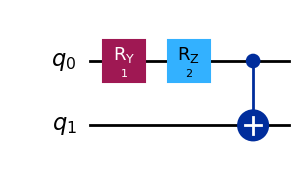

In [17]:
# Assign our function to a variable for easier calling
varform_qc = example_2qubits_2params_quantum_circuit

# Create a circuit with specific parameters (theta=1, phi=2)
qc = varform_qc(1,2)

# Display explanation of the circuit
display(Markdown('''
**Example Circuit Visualization:**
- This circuit applies an Ry(1) rotation followed by an Rz(2) rotation on qubit 0
- Then it applies a CNOT gate with control on qubit 0 and target on qubit 1
- This creates entanglement between the two qubits
'''))

# Visualize the circuit using matplotlib renderer
qc.draw('mpl')

## Using qiskit parameter

The other way to generate a parametrized `QuantumCircuit` is to use the `Parameter` class in `qiskit`.

In [18]:
# Import the Parameter class for creating parameterized circuits
from qiskit.circuit import Parameter

# Display information about parameterization
display(Markdown('''
**Note:** The `Parameter` class allows us to create symbolic parameters in quantum circuits.
This makes it easy to create variational circuits where gate parameters can be optimized.
'''))


**Note:** The `Parameter` class allows us to create symbolic parameters in quantum circuits.
This makes it easy to create variational circuits where gate parameters can be optimized.


Here is the same circuit as before done with this method.


**Parameterized Circuit:**
- This circuit uses symbolic parameters 'a' and 'b' instead of fixed values
- Parameters can be assigned different values later when executing the circuit
- This allows us to reuse the same circuit structure with different parameter values


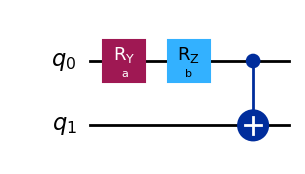

In [19]:
# Create symbolic parameters for our circuit
a = Parameter('a')
b = Parameter('b')

# Create a new parametrized quantum circuit
varform_qc = QuantumCircuit(2)

# Add gates with parameters instead of fixed values
varform_qc.ry(a,0)  # Parametrized Ry rotation
varform_qc.rz(b,0)  # Parametrized Rz rotation
varform_qc.cx(0,1)  # Standard CNOT gate

# Display explanation about parameterized circuits
display(Markdown('''
**Parameterized Circuit:**
- This circuit uses symbolic parameters 'a' and 'b' instead of fixed values
- Parameters can be assigned different values later when executing the circuit
- This allows us to reuse the same circuit structure with different parameter values
'''))

# Visualize the parameterized circuit
varform_qc.draw('mpl')

Done this way the parametrized circuit can be drawn right away.


**Circuit Visualization:**
- The circuit is shown with symbolic parameters 'a' and 'b'
- This visualization is available directly with parameterized circuits
- The circuit structure is identical to our previous example but uses symbolic parameters


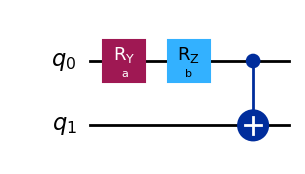

In [20]:
# Display information about visualization
display(Markdown('''
**Circuit Visualization:**
- The circuit is shown with symbolic parameters 'a' and 'b'
- This visualization is available directly with parameterized circuits
- The circuit structure is identical to our previous example but uses symbolic parameters
'''))

# Visualize the parameterized circuit again
varform_qc.draw('mpl')

To see what are the parameters of a parametrized `QuantumCircuit` you can use

In [21]:
# Check what parameters exist in our parameterized circuit
varform_qc.parameters

display(Markdown('''
**Circuit Parameters:**
- The `.parameters` property shows all symbolic parameters in the circuit
- Each parameter has a unique name and can be assigned different values
- This allows us to keep track of which parameters need values during optimization
'''))


**Circuit Parameters:**
- The `.parameters` property shows all symbolic parameters in the circuit
- Each parameter has a unique name and can be assigned different values
- This allows us to keep track of which parameters need values during optimization


To assign values to the different parameters we need to use the `QuantumCircuit.assign_paremeters()` method. This methods takes a `dict` as an argument containing the `Parameter`s and their `value`s.


**Parameter Assignment:**
- We create a dictionary mapping each Parameter object to its numerical value
- The `.assign_parameters()` method creates a new circuit with parameters replaced by values
- Notice that the circuit diagram now shows the actual parameter values (1 and 2)


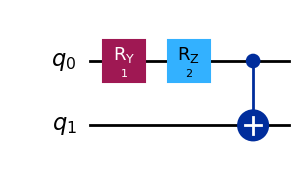

In [22]:
# Create a dictionary mapping parameters to their values
param_dict = {a : 1, b : 2}

# Assign these values to the circuit parameters
qc = varform_qc.assign_parameters(param_dict)

# Display explanation
display(Markdown('''
**Parameter Assignment:**
- We create a dictionary mapping each Parameter object to its numerical value
- The `.assign_parameters()` method creates a new circuit with parameters replaced by values
- Notice that the circuit diagram now shows the actual parameter values (1 and 2)
'''))

# Visualize the circuit with assigned parameter values
qc.draw('mpl')

If you want to provide the parameter values as a `list` or a `np.array` you can build the `dict` directly. Just make sure that the order you use in `param_values` corresponds to the other of `varform_qc.parameters`.

In [23]:
# Alternative approach: Create parameter dictionary from a list of values
param_values = [1, 2]

# Use zip to pair parameters with values and create dictionary
param_dict = dict(zip(varform_qc.parameters, param_values))

# Display the resulting parameter dictionary
print(param_dict)

display(Markdown('''
**List-based Parameter Assignment:**
- This approach lets you store parameter values as a list or array
- The `zip()` function pairs each parameter with its corresponding value
- When using this method, the order of parameters must match the order in `varform_qc.parameters`
- This approach is useful when working with optimization algorithms that work with arrays
'''))

{Parameter(a): 1, Parameter(b): 2}



**List-based Parameter Assignment:**
- This approach lets you store parameter values as a list or array
- The `zip()` function pairs each parameter with its corresponding value
- When using this method, the order of parameters must match the order in `varform_qc.parameters`
- This approach is useful when working with optimization algorithms that work with arrays


## Varforms circuits for H2
Using the method of you choice, prepare 2 different 4-qubit `QuantumCircuit`s. 
- The first should take 1 parameter to cover the real coefficients state sub space spanned by $|0101\rangle$ and $|1010\rangle$.
- The second should take 3 parameters to cover the real coefficients state sub space spanned by $|0101\rangle$, $|0110\rangle$, $|1001\rangle$ and $|1010\rangle$.

Revisit the presentation to find such circuits.

Building 1-parameter variational form for H2 molecule
Step 1: Preparing |0101⟩ state with X gates on qubits 1 and 3
Step 2: Applying parameterized Ry rotations to create superposition
Step 3: Adding CNOT gates for entanglement
Variational form with 1 parameter complete



**Circuit explanation:**
- This circuit creates a superposition of |0101⟩ and |1010⟩ states
- The parameter 'a' controls the amplitude of each state in the superposition
- When a = 0: Circuit outputs |0101⟩
- When a = π/2: Circuit creates an equal superposition
- CNOT gates create the necessary entanglement between qubit pairs


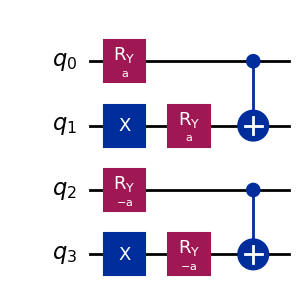

In [ ]:
# Creating a 4-qubit variational form with 1 parameter
varform_4qubits_1param = QuantumCircuit(4)
a = Parameter('a')

print("Building 1-parameter variational form for H2 molecule")

# Prepare |0101⟩ state
print("Step 1: Preparing |0101⟩ state with X gates on qubits 1 and 3")
varform_4qubits_1param.x([1, 3])

# Apply parameterized rotation to create superposition
print("Step 2: Applying parameterized Ry rotations to create superposition")
varform_4qubits_1param.ry(a, 0)
varform_4qubits_1param.ry(a, 1)
varform_4qubits_1param.ry(-a, 2)
varform_4qubits_1param.ry(-a, 3)

# Add CNOT gates for entanglement
print("Step 3: Adding CNOT gates for entanglement")
varform_4qubits_1param.cx(0, 1)
varform_4qubits_1param.cx(2, 3)

print("Variational form with 1 parameter complete")

display(Markdown('''
**Circuit explanation:**
- This circuit creates a superposition of |0101⟩ and |1010⟩ states
- The parameter 'a' controls the amplitude of each state in the superposition
- When a = 0: Circuit outputs |0101⟩
- When a = π/2: Circuit creates an equal superposition
- CNOT gates create the necessary entanglement between qubit pairs
'''))

varform_4qubits_1param.draw('mpl')


Building 3-parameter variational form for H2 molecule
Step 1: Preparing |0101⟩ state with X gates on qubits 1 and 3
Step 2: Applying parameterized Ry rotations with different parameters
Step 3: Adding CNOT gates for entanglement between all relevant qubit pairs
Variational form with 3 parameters complete



**Circuit explanation:**
- This circuit creates a superposition spanning |0101⟩, |0110⟩, |1001⟩, and |1010⟩ states
- Three parameters (a, b, c) allow more flexibility in the state preparation:
  * Parameter 'a' controls rotation on qubit 0
  * Parameter 'b' controls rotations on qubits 1 and 2
  * Parameter 'c' controls rotation on qubit 3
- The extra CNOT between qubits 1 and 2 creates entanglement across all qubits


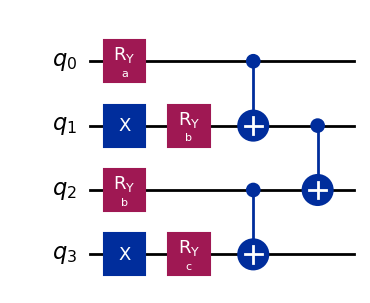

In [ ]:
# Creating a 4-qubit variational form with 3 parameters
varform_4qubits_3params = QuantumCircuit(4)
a = Parameter('a')
b = Parameter('b')
c = Parameter('c')

print("Building 3-parameter variational form for H2 molecule")

# Prepare |0101⟩ state
print("Step 1: Preparing |0101⟩ state with X gates on qubits 1 and 3")
varform_4qubits_3params.x([1, 3])

# Apply parameterized rotations for the superposition
print("Step 2: Applying parameterized Ry rotations with different parameters")
varform_4qubits_3params.ry(a, 0)
varform_4qubits_3params.ry(b, 1)
varform_4qubits_3params.ry(b, 2)
varform_4qubits_3params.ry(c, 3)

# Add CNOT gates for entanglement
print("Step 3: Adding CNOT gates for entanglement between all relevant qubit pairs")
varform_4qubits_3params.cx(0, 1)
varform_4qubits_3params.cx(2, 3)
varform_4qubits_3params.cx(1, 2)

print("Variational form with 3 parameters complete")

display(Markdown('''
**Circuit explanation:**
- This circuit creates a superposition spanning |0101⟩, |0110⟩, |1001⟩, and |1010⟩ states
- Three parameters (a, b, c) allow more flexibility in the state preparation:
  * Parameter 'a' controls rotation on qubit 0
  * Parameter 'b' controls rotations on qubits 1 and 2
  * Parameter 'c' controls rotation on qubit 3
- The extra CNOT between qubits 1 and 2 creates entanglement across all qubits
'''))

varform_4qubits_3params.draw('mpl')


# Estimation

The goal of the estimation is to estimate the expectation value of an observable for a given quantum state. 

## Pauli Based Measurements

Since our observable (the Hamiltonian) is given as a linear combination of Pauli strings, we will need to estimate the expectation value of these Pauli string.

\begin{align*}
    \langle \psi |\hat{O} | \psi \rangle 
    =
    \sum_i h_i  \langle\psi |\hat{P}_i | \psi \rangle.
\end{align*} 

### Diagonalisation

We have seen that even if a quantum computer can only measure qubits in the Z-basis, the X and Y-basis are accessible if we *rotate* the quantum state before measuring. 

\begin{align*}
    \langle\psi |\hat{P} | \psi \rangle 
    =
    \langle\psi |\hat{U}^\dagger_\text{diag} \hat{\mathcal{Z}} \hat{U}_\text{diag} | \psi \rangle 
    = 
    \langle\psi^\prime |\hat{\mathcal{Z}} | \psi^\prime \rangle.
\end{align*} 

Implement the function : `diagonal_pauli_with_circuit` in the `estimation.py` file. This should return a diagonal `PauliString` and the `QuantumCircuit` that performs a transformation which diagonalize it.

Test your code with the next cell.

Original Pauli string: ZIXY
Diagonalized Pauli string: ZIZZ (should be 'ZIZZ')

Diagonal circuit that transforms the original Pauli basis to Z basis:



**Note on diagonalization:**
- For Y-measurements: We apply S† then H gates
- For X-measurements: We apply H gates
- For Z-measurements: No gates needed (already in computational basis)
- For Identity (I): No gates needed (doesn't affect measurement)


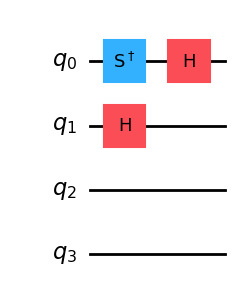

In [30]:
%autoreload
from quantum_chemistry.pauli import PauliString
from quantum_chemistry.estimation import diagonal_pauli_with_circuit

# Create a Pauli string to test diagonalization
pauli_string = PauliString.from_str('ZIXY')
print(f"Original Pauli string: {pauli_string}")

# Diagonalize the Pauli string and get the circuit
diagonal_pauli, diagonal_circuit = diagonal_pauli_with_circuit(pauli_string)
print(f"Diagonalized Pauli string: {diagonal_pauli} (should be 'ZIZZ')")
print("\nDiagonal circuit that transforms the original Pauli basis to Z basis:")

display(Markdown('''
**Note on diagonalization:**
- For Y-measurements: We apply S† then H gates
- For X-measurements: We apply H gates
- For Z-measurements: No gates needed (already in computational basis)
- For Identity (I): No gates needed (doesn't affect measurement)
'''))

diagonal_circuit.draw('mpl')

This diagonalisation circuit should then be composed with the circuit which prepares the state $| \psi \rangle$ to get a new circuit which prepares the state $| \psi^\prime \rangle$. This new state will be sampled, meaning it will be measured many times. Each time it will return a bit string, one bit per qubit.

### Diagonal PauliString eigenvalue

Each bit string is an eigenstate to the diagonal Pauli string and there is a associated eigenvalue. This eigenvalue can only be `+1` or `-1`. Therefore you need to code the function `diagonal_pauli_eigenvalue` to compute this value.

\begin{align*}
    \hat{P} |q\rangle = \Lambda_q^{(P)} |q\rangle
\end{align*}

Use the following code to test you implementation. You should get `1`, `-1`, `1` and `-1`.

In [31]:
%autoreload
from quantum_chemistry.estimation import diagonal_pauli_eigenvalue, bitstring_to_bits
from quantum_chemistry.pauli import PauliString

# Create a diagonal Pauli string for testing eigenvalue calculation
diag_pauli = PauliString.from_str("ZZZI")
print(f"Diagonal Pauli string: {diag_pauli}")

# Test eigenvalue calculation with different bit strings
print("\nCalculating eigenvalues for different bit strings:")
print(f"Bitstring '0001' → Eigenvalue: {diagonal_pauli_eigenvalue(diag_pauli,bitstring_to_bits("0001"))}")
print(f"Bitstring '0100' → Eigenvalue: {diagonal_pauli_eigenvalue(diag_pauli,bitstring_to_bits("0100"))}")
print(f"Bitstring '1100' → Eigenvalue: {diagonal_pauli_eigenvalue(diag_pauli,bitstring_to_bits("1100"))}")
print(f"Bitstring '1110' → Eigenvalue: {diagonal_pauli_eigenvalue(diag_pauli,bitstring_to_bits("1110"))}")

display(Markdown('''
**Note on Pauli eigenvalues:**
- For a diagonal Pauli string (all Z operators or Identity), each computational basis state is an eigenstate
- The eigenvalue is determined by counting the number of qubits where:
  * The qubit is in state |1⟩ AND
  * The corresponding Pauli operator is Z (not Identity)
- If this count is even, the eigenvalue is +1; if odd, the eigenvalue is -1
'''))

Diagonal Pauli string: ZZZI

Calculating eigenvalues for different bit strings:
Bitstring '0001' → Eigenvalue: 1
Bitstring '0100' → Eigenvalue: -1
Bitstring '1100' → Eigenvalue: 1
Bitstring '1110' → Eigenvalue: -1



**Note on Pauli eigenvalues:**
- For a diagonal Pauli string (all Z operators or Identity), each computational basis state is an eigenstate
- The eigenvalue is determined by counting the number of qubits where:
  * The qubit is in state |1⟩ AND
  * The corresponding Pauli operator is Z (not Identity)
- If this count is even, the eigenvalue is +1; if odd, the eigenvalue is -1


### Diagonal PauliString expectation value

Let's now estimate the expectation value of a single diagonal `PauliString`. This needs to be done in the method `diagonal_pauli_expectation_value()`. Implement this method using the one you just implemented (`diagonal_pauli_eigenvalue`) and the following equation
\begin{align*}
    \langle\psi| \hat{P}|\psi \rangle \approx \frac{1}{N_\text{tot}}\sum_{q} N_q \Lambda_q^{(P)}
\end{align*}
where $\Lambda_q^{(P)}$ is the eigenvalue of the `PauliString` for a state $|q\rangle$ and $N_q$ is the counts, i.e. the number of times this state was measured. Testing your implementation, you should get an expectation value of `0.5`.

In [34]:
%autoreload
from quantum_chemistry.estimation import diagonal_pauli_expectation_value
from quantum_chemistry.pauli import PauliString

# Create a diagonal Pauli string to test expectation value calculation
diagonal_pauli = PauliString.from_str('ZIZZ')
print(f"Diagonal Pauli string: {diagonal_pauli}")

# Create a counts dictionary representing measurement results
counts = {'0110' : 25, '1001' : 75}
print(f"Measurement counts: {counts}")
print(f"  - State '0110' was measured 25 times")
print(f"  - State '1001' was measured 75 times")

# Calculate the expectation value
print("\nCalculating expectation value...")
pauli_string_expectation_value = diagonal_pauli_expectation_value(diagonal_pauli, counts)
print(f"Expectation value: {pauli_string_expectation_value}")

display(Markdown('''
**Expectation value calculation:**
- For each measured bitstring, we calculate its eigenvalue with respect to the Pauli string
- We weight each eigenvalue by how frequently that bitstring was measured
- The expectation value is the weighted average of all eigenvalues
- Formula: $\\langle P \\rangle = \\sum_i \\frac{n_i}{N} \\lambda_i$ where:
  * $n_i$ is the count for bitstring $i$
  * $N$ is the total count
  * $\\lambda_i$ is the eigenvalue of bitstring $i$
'''))

Diagonal Pauli string: ZIZZ
Measurement counts: {'0110': 25, '1001': 75}
  - State '0110' was measured 25 times
  - State '1001' was measured 75 times

Calculating expectation value...
Expectation value: 0.5



**Expectation value calculation:**
- For each measured bitstring, we calculate its eigenvalue with respect to the Pauli string
- We weight each eigenvalue by how frequently that bitstring was measured
- The expectation value is the weighted average of all eigenvalues
- Formula: $\langle P \rangle = \sum_i \frac{n_i}{N} \lambda_i$ where:
  * $n_i$ is the count for bitstring $i$
  * $N$ is the total count
  * $\lambda_i$ is the eigenvalue of bitstring $i$


### Assemble circuits

There is one diagonalisation circuit for each `PauliString`. 

\begin{align*}
    \langle\psi |\hat{P}_i | \psi \rangle = \langle\psi |\hat{U}^{(i)\dagger}_{\text{diag}} \hat{\mathcal{Z}}_i \hat{U}^{(i)}_{\text{diag}} | \psi \rangle = \langle\psi^{(i)} | \hat{\mathcal{Z}}_i  | \psi^{(i)} \rangle.
\end{align*}

We need to construct the rotated state for each Pauli string and then apply the *measurements*. Given a list of `PauliString`s and a quantum circuit, this is the task of the function `prepare_estimation_circuits_and_diagonal_paulis`. 

In [35]:
%autoreload
from quantum_chemistry.estimation import prepare_estimation_circuits_and_diagonal_paulis
from qiskit.circuit import QuantumCircuit

# Create a list of Pauli strings to measure
paulis = [PauliString.from_str('ZXZX'), PauliString.from_str('XZXZ')]
print(f"Pauli strings to measure: {paulis}")

# Create a simple state preparation circuit
state_circuit = QuantumCircuit(4)
state_circuit.x([0,2])  # Apply X gates to qubits 0 and 2

# Display information about estimation circuits
display(Markdown('''
**Estimation Circuit Generation:**
- For each Pauli string, we create a specialized measurement circuit
- Each circuit includes:
  1. The state preparation circuit (identical for all Pauli strings)
  2. Basis rotation gates to transform X and Y measurements to Z basis
  3. Measurement operations
- The diagonalized Pauli strings tell us how to interpret the measurement results
'''))

print("\nState preparation circuit:")
state_circuit.draw('mpl')

# Generate estimation circuits that include state preparation and basis rotations
print("\nGenerating estimation circuits...")
estimation_circuits, diagonal_paulis = prepare_estimation_circuits_and_diagonal_paulis(paulis, state_circuit)
print(f"Generated {len(estimation_circuits)} circuits for measurement")

# Print each estimation circuit
print("\nEstimation circuits:")
for i, estimation_circuit in enumerate(estimation_circuits):
    print(f"\nCircuit {i+1} for measuring {paulis[i]} (diagonalized to {diagonal_paulis[i]})")
    print(estimation_circuit)
    # Draw the circuit for better visualization
    estimation_circuit.draw('mpl')

Pauli strings to measure: [<quantum_chemistry.pauli.PauliString object at 0x000001F717E10E20>, <quantum_chemistry.pauli.PauliString object at 0x000001F717E10AF0>]



**Estimation Circuit Generation:**
- For each Pauli string, we create a specialized measurement circuit
- Each circuit includes:
  1. The state preparation circuit (identical for all Pauli strings)
  2. Basis rotation gates to transform X and Y measurements to Z basis
  3. Measurement operations
- The diagonalized Pauli strings tell us how to interpret the measurement results



State preparation circuit:

Generating estimation circuits...
Generated 2 circuits for measurement

Estimation circuits:

Circuit 1 for measuring ZXZX (diagonalized to ZZZZ)
        ┌───┐┌───┐ ░ ┌─┐         
   q_0: ┤ X ├┤ H ├─░─┤M├─────────
        └───┘└───┘ ░ └╥┘┌─┐      
   q_1: ───────────░──╫─┤M├──────
        ┌───┐┌───┐ ░  ║ └╥┘┌─┐   
   q_2: ┤ X ├┤ H ├─░──╫──╫─┤M├───
        └───┘└───┘ ░  ║  ║ └╥┘┌─┐
   q_3: ───────────░──╫──╫──╫─┤M├
                   ░  ║  ║  ║ └╥┘
meas: 4/══════════════╩══╩══╩══╩═
                      0  1  2  3 

Circuit 2 for measuring XZXZ (diagonalized to ZZZZ)
        ┌───┐ ░ ┌─┐         
   q_0: ┤ X ├─░─┤M├─────────
        ├───┤ ░ └╥┘┌─┐      
   q_1: ┤ H ├─░──╫─┤M├──────
        ├───┤ ░  ║ └╥┘┌─┐   
   q_2: ┤ X ├─░──╫──╫─┤M├───
        ├───┤ ░  ║  ║ └╥┘┌─┐
   q_3: ┤ H ├─░──╫──╫──╫─┤M├
        └───┘ ░  ║  ║  ║ └╥┘
meas: 4/═════════╩══╩══╩══╩═
                 0  1  2  3 


### Running the circuits

We need to run and sample these circuits using a `Backend` which could be a simulator or a quantum computer.  Here we provide a simple way to do that using the `AerSimulator`. It should be pretty straight forward to use a quantum computer instead.

In [36]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator

print("Setting up the quantum backend for simulation...")
backend = AerSimulator()
print(f"Using backend: {backend.name}")

print("\nCreating a sampler to collect measurement outcomes...")
sampler = Sampler(mode=backend)

print("\nOptimizing circuits for the backend...")
pass_manager = generate_preset_pass_manager(backend=backend, optimization_level=1)
print(f"Optimization level: 1 (basic circuit optimization)")

print("\nTranspiling circuits to backend's instruction set...")
isa_circuits = pass_manager.run(estimation_circuits)

print("\nSubmitting job to the backend...")
job = sampler.run(isa_circuits)
print("Retrieving results...")
results = job.result()

display(Markdown('''
**Circuit execution process:**
1. First, circuits are optimized through transpilation
2. Then, they're mapped to the backend's native gate set
3. Finally, circuits are executed and measurement results are collected
4. Each circuit is run multiple times (shots) to build a statistical distribution
'''))

Setting up the quantum backend for simulation...
Using backend: aer_simulator

Creating a sampler to collect measurement outcomes...

Optimizing circuits for the backend...
Optimization level: 1 (basic circuit optimization)

Transpiling circuits to backend's instruction set...

Submitting job to the backend...
Retrieving results...
Optimization level: 1 (basic circuit optimization)

Transpiling circuits to backend's instruction set...

Submitting job to the backend...
Retrieving results...



**Circuit execution process:**
1. First, circuits are optimized through transpilation
2. Then, they're mapped to the backend's native gate set
3. Finally, circuits are executed and measurement results are collected
4. Each circuit is run multiple times (shots) to build a statistical distribution


In [37]:
# Extract and display measurement counts for each circuit
print("Measurement results for each Pauli string:")
for i in range(len(estimation_circuits)):
    # Get counts dictionary for this circuit
    counts = results[i].data.meas.get_counts()
    print(f"\nResults for measuring {paulis[i]} (diagonalized to {diagonal_paulis[i]})")
    print(f"Measurement counts: {counts}")
    
    # Calculate and show the total number of shots
    total_shots = sum(counts.values())
    print(f"Total shots: {total_shots}")

display(Markdown('''
**Understanding Measurement Results:**
- Each dictionary shows the distribution of measured bit strings
- Keys are the bit strings (e.g., '0101')
- Values are the number of times each bit string was measured
- These counts will be used to calculate the expectation value of each Pauli string
'''))

Measurement results for each Pauli string:

Results for measuring ZXZX (diagonalized to ZZZZ)
Measurement counts: {'0000': 284, '0100': 227, '0001': 273, '0101': 240}
Total shots: 1024

Results for measuring XZXZ (diagonalized to ZZZZ)
Measurement counts: {'0101': 258, '1101': 261, '0111': 242, '1111': 263}
Total shots: 1024



**Understanding Measurement Results:**
- Each dictionary shows the distribution of measured bit strings
- Keys are the bit strings (e.g., '0101')
- Values are the number of times each bit string was measured
- These counts will be used to calculate the expectation value of each Pauli string


### Estimate the expectation value of multiple Pauli strings

Now that you can sample circuit, you can assemble the previous functions to compute the estimations of the expectation values for a list of `PauliString`s given a quantum state.

In [38]:
from quantum_chemistry.estimation import estimate_paulis_expectation_values
from quantum_chemistry.pauli import PauliString
from qiskit.circuit import QuantumCircuit
from qiskit_aer import AerSimulator

# Create a simulator backend
backend = AerSimulator()
print(f"Using backend: {backend.name}")

# Create Pauli strings to estimate expectation values for
paulis = [PauliString.from_str('ZXZX'), PauliString.from_str('XZXZ')]
print(f"\nPauli strings to measure: {paulis}")

# Create a quantum state to measure
state_circuit = QuantumCircuit(4)
state_circuit.x([0,2])    # Apply X gates to qubits 0 and 2
state_circuit.h([1,3])    # Apply H gates to qubits 1 and 3

# Display information about expectation value calculation
display(Markdown('''
**Expectation Value Calculation Process:**
1. For each Pauli string, a specialized measurement circuit is created
2. The circuit includes necessary basis rotations for X and Y measurements
3. The circuit is executed on the simulator to collect measurement statistics
4. The measurement results are processed to calculate the expectation value
5. The expectation value tells us the average value we would get measuring that observable
'''))

print("\nState preparation circuit:")
state_circuit.draw('mpl')

# Estimate expectation values of the Pauli strings
print("\nEstimating expectation values...")
expectation_values = estimate_paulis_expectation_values(paulis, state_circuit, backend)

# Display results
print("\nExpectation values:")
for i, pauli in enumerate(paulis):
    print(f"<{pauli}> = {expectation_values[i]:.6f}")

Using backend: aer_simulator

Pauli strings to measure: [<quantum_chemistry.pauli.PauliString object at 0x000001F6D714A8A0>, <quantum_chemistry.pauli.PauliString object at 0x000001F718F0D130>]



**Expectation Value Calculation Process:**
1. For each Pauli string, a specialized measurement circuit is created
2. The circuit includes necessary basis rotations for X and Y measurements
3. The circuit is executed on the simulator to collect measurement statistics
4. The measurement results are processed to calculate the expectation value
5. The expectation value tells us the average value we would get measuring that observable



State preparation circuit:

Estimating expectation values...

Expectation values:
<ZXZX> = -0.003906
<XZXZ> = 1.000000


In [39]:
from quantum_chemistry.estimation import estimate_observable_expectation_value
from quantum_chemistry.pauli import PauliString, Operator
from qiskit.circuit import QuantumCircuit
from qiskit_aer import AerSimulator

# Create a simulator backend
backend = AerSimulator()
print(f"Using backend: {backend.name}")

# Create Pauli strings and construct an operator
paulis = [PauliString.from_str('ZXZX'), PauliString.from_str('XZXZ')]
operator = Operator([1,-1], paulis)  # Linear combination with coefficients 1 and -1
print(f"\nOperator: {operator}")

# Create a quantum state to measure
state_circuit = QuantumCircuit(4)
state_circuit.x([0,2])    # Apply X gates to qubits 0 and 2
state_circuit.h([1,3])    # Apply H gates to qubits 1 and 3
print("\nState preparation circuit:")
state_circuit.draw('mpl')

# Estimate expectation value of the operator
print("\nEstimating operator expectation value...")
expectation_value = estimate_observable_expectation_value(operator, state_circuit, backend)

# Display results
print(f"\nExpectation value of the operator: {expectation_value:.6f}")

display(Markdown('''
**Operator Expectation Value:**
- The operator is a weighted sum of Pauli strings: 1.0*ZXZX + (-1.0)*XZXZ
- To calculate its expectation value:
  1. We first calculate the expectation value of each Pauli string
  2. Then we compute the weighted sum using the coefficients
- This allows us to measure complex observables like Hamiltonians
'''))

Using backend: aer_simulator

Operator: (1.00)*ZXZX + (-1.00)*XZXZ

State preparation circuit:

Estimating operator expectation value...

Expectation value of the operator: -0.996094



**Operator Expectation Value:**
- The operator is a weighted sum of Pauli strings: 1.0*ZXZX + (-1.0)*XZXZ
- To calculate its expectation value:
  1. We first calculate the expectation value of each Pauli string
  2. Then we compute the weighted sum using the coefficients
- This allows us to measure complex observables like Hamiltonians


### Estimate the expectation value of an Operator

This should be easy to do now.

### The Hamiltonian evaluation test

We will now use tools from the previous tutorial to construct an Hamiltonian and estimate its expectation value for the basis quantum states $|0101\rangle$ and $|1010\rangle$ which should be respectively around `-1.82` and `-0.26`.

In [40]:
from quantum_chemistry.estimation import estimate_observable_expectation_value
from quantum_chemistry.mapping import build_qubit_hamiltonian, creation_annihilation_operators_with_jordan_wigner
from quantum_chemistry.molecule.h2_molecule import load_h2_spin_orbital_integral
from qiskit.circuit import QuantumCircuit
from qiskit_aer import AerSimulator

# Create a simulator backend
backend = AerSimulator()
print(f"Using backend: {backend.name}")

# Load H2 molecule data at a specific bond distance
print("\nLoading H2 molecule data...")
distance, one_body, two_body, nuc_eneg = load_h2_spin_orbital_integral("../h2_data","h2_mo_integrals_d_0750.npz")
print(f"Bond distance: {distance} Å")
print(f"Nuclear repulsion energy: {nuc_eneg:.6f} Ha")

# Create fermionic operators and map to qubit operators using Jordan-Wigner transformation
print("\nGenerating fermionic operators and mapping to qubit operators...")
creation_operators, annihilation_operators = creation_annihilation_operators_with_jordan_wigner(4)

# Build the qubit Hamiltonian from molecular integrals
print("Building qubit Hamiltonian...")
qubit_hamiltonian = build_qubit_hamiltonian(one_body, two_body, creation_operators, annihilation_operators)
print(f"Hamiltonian contains {len(qubit_hamiltonian.paulis)} Pauli terms")

# Create a quantum state to measure
print("\nPreparing quantum state |0101⟩...")
state_circuit = QuantumCircuit(4)
# state_circuit.x([0,2])  # This would prepare |1010⟩
state_circuit.x([1,3])    # This prepares |0101⟩

# Display information about the H2 calculation
display(Markdown('''
**H2 Hamiltonian Evaluation:**
- We loaded molecular integrals for H2 at a bond distance of 0.75 Å
- Using Jordan-Wigner transformation, we mapped the fermionic Hamiltonian to a qubit Hamiltonian
- We prepared the |0101⟩ state, which corresponds to a specific electron configuration
- The measured energy should be approximately -1.82 Ha for the electronic energy
- To get the total molecular energy, we add the nuclear repulsion energy
'''))

print("State preparation circuit:")
state_circuit.draw('mpl')

# Estimate the energy of the H2 molecule in this state
print("\nEstimating H2 Hamiltonian expectation value...")
expectation_values = estimate_observable_expectation_value(qubit_hamiltonian, state_circuit, backend)

# Display results
print(f"\nEnergy of state |0101⟩: {expectation_values.real:.6f} Ha")
print(f"Total molecular energy (electronic + nuclear): {expectation_values.real + nuc_eneg:.6f} Ha")

Using backend: aer_simulator

Loading H2 molecule data...
Loading h2_mo_integrals_d_0750.npz
Bond distance: 0.75 Å
Nuclear repulsion energy: 0.705570 Ha

Generating fermionic operators and mapping to qubit operators...
Building qubit Hamiltonian...
Hamiltonian contains 15 Pauli terms

Preparing quantum state |0101⟩...



**H2 Hamiltonian Evaluation:**
- We loaded molecular integrals for H2 at a bond distance of 0.75 Å
- Using Jordan-Wigner transformation, we mapped the fermionic Hamiltonian to a qubit Hamiltonian
- We prepared the |0101⟩ state, which corresponds to a specific electron configuration
- The measured energy should be approximately -1.82 Ha for the electronic energy
- To get the total molecular energy, we add the nuclear repulsion energy


State preparation circuit:

Estimating H2 Hamiltonian expectation value...

Energy of state |0101⟩: -0.267796 Ha
Total molecular energy (electronic + nuclear): 0.437774 Ha

Energy of state |0101⟩: -0.267796 Ha
Total molecular energy (electronic + nuclear): 0.437774 Ha


# Variationnal Quantum Eigensolver

In a final step we need to implement a solver that will explore the quantum state space to try to find the quantum state which minimize the energy.

Like any minimzation process this solver will need a couple of ingredients :
- A function to minimize : we will compute the expectation of the Hamiltonian.
- A method : an algorithm that generaly takes in a function and a set of starting parameters and returns the best guess for the optimal parameters that correspond to the minimal value of the function to minimize.
- A set of starting parameters.

### Cost function

The cost function need to compute the energy for a given set of parameter.

\begin{align*}
    E_0 
    = \min_{\boldsymbol{\theta}} E(\boldsymbol{\theta}) 
    = \min_{\boldsymbol{\theta}} \langle \psi(\boldsymbol{\theta}) | \hat{H} | \psi(\boldsymbol{\theta}) \rangle
\end{align*}

This function could be defined in the following way, provided that the `ansatz_circuit` and the `hamiltonian` are alreayd defined.

In [41]:
def cost_function(params):
    
    print(f"Evaluating cost function at parameters: {params}")
    
    # Create the quantum state for these specific parameters
    print("Creating parametrized quantum circuit...")
    state_circuit = ansatz_circuit.assign_parameters(params)
    
    # Calculate the expectation value of the Hamiltonian for this state
    print("Estimating Hamiltonian expectation value...")
    hamiltonian_expectation_value = estimate_observable_expectation_value(hamiltonian, state_circuit, backend)
    
    print(f"Energy at these parameters: {hamiltonian_expectation_value.real:.6f} Ha")
    return hamiltonian_expectation_value.real

display(Markdown('''
**Cost function explanation:**
- This function evaluates the energy for a specific set of parameter values
- For each parameter set in the optimization process:
  1. We assign the parameters to our ansatz circuit
  2. We simulate/run the circuit to prepare the quantum state
  3. We estimate the expectation value of our Hamiltonian
- The result is the energy (real part only) which we want to minimize
'''))


**Cost function explanation:**
- This function evaluates the energy for a specific set of parameter values
- For each parameter set in the optimization process:
  1. We assign the parameters to our ansatz circuit
  2. We simulate/run the circuit to prepare the quantum state
  3. We estimate the expectation value of our Hamiltonian
- The result is the energy (real part only) which we want to minimize


In [42]:
from scipy.optimize import minimize

# Create a wrapper for the SLSQP optimizer with specific settings
minimizer = lambda cost_fun, starting_params : minimize(
    cost_fun,
    starting_params,
    method = 'SLSQP', 
    options = {'maxiter' : 5,'eps' : 1e-1, 'ftol' : 1e-4, 'disp' : True, 'iprint' : 2})

display(Markdown('''
**Optimization Settings Explanation:**
- **method='SLSQP'**: Sequential Least Squares Programming algorithm, suitable for VQE
- **maxiter=5**: Maximum number of iterations (kept small for demonstration)
- **eps=0.1**: Step size for numerical gradient estimation (appropriate for angular parameters)
- **ftol=1e-4**: Tolerance for convergence (chemical accuracy is around 1 milli-Hartree)
- **disp=True** and **iprint=2**: Display detailed information during optimization

The optimizer will systematically adjust the circuit parameters to find the
quantum state with the lowest energy expectation value.
'''))


**Optimization Settings Explanation:**
- **method='SLSQP'**: Sequential Least Squares Programming algorithm, suitable for VQE
- **maxiter=5**: Maximum number of iterations (kept small for demonstration)
- **eps=0.1**: Step size for numerical gradient estimation (appropriate for angular parameters)
- **ftol=1e-4**: Tolerance for convergence (chemical accuracy is around 1 milli-Hartree)
- **disp=True** and **iprint=2**: Display detailed information during optimization

The optimizer will systematically adjust the circuit parameters to find the
quantum state with the lowest energy expectation value.


Creating variational ansatz circuit for H2...



**VQE Optimization Process:**
- Starting with our parameterized H2 circuit, VQE will find the optimal parameter values
- The optimization uses a classical optimizer (SLSQP) combined with quantum energy estimation
- At each step, we'll evaluate the energy for different parameter values
- The algorithm will converge to the parameter values that minimize energy


Ansatz circuit structure:

Circuit parameters: ParameterView([Parameter(theta)])

Starting VQE optimization process...
This will iteratively adjust circuit parameters to minimize energy
  NIT    FC           OBJFUN            GNORM
  NIT    FC           OBJFUN            GNORM
    1     3    -3.160275E-01     2.012508E-01
    1     3    -3.160275E-01     2.012508E-01
    2     5     7.047957E-02     5.068390E-01
    2     5     7.047957E-02     5.068390E-01
    3     8    -8.397321E-01     7.260528E-02
    3     8    -8.397321E-01     7.260528E-02
    4    10    -4.566284E-01     2.259632E-01
    4    10    -4.566284E-01     2.259632E-01
    5    13    -8.533784E-01     8.536095E-02
Iteration limit reached    (Exit mode 9)
            Current function value: -0.8533783823267335
            Iterations: 5
            Function evaluations: 13
            Gradient evaluations: 5

Optimization complete!
Optimal parameters: [1.58568222]
Ground state energy: -0.853378 Ha

Optimal circuit:
   

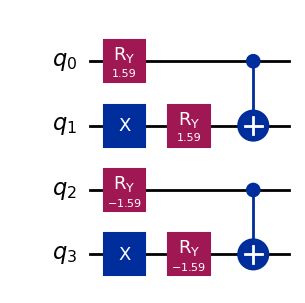

In [43]:
from quantum_chemistry.vqe import h2_ansatz_circuit, minimize_expectation_value

# Get the variational form circuit for H2
print("Creating variational ansatz circuit for H2...")
ansatz_circuit = h2_ansatz_circuit()

# Display information about VQE
display(Markdown(f'''
**VQE Optimization Process:**
- Starting with our parameterized H2 circuit, VQE will find the optimal parameter values
- The optimization uses a classical optimizer (SLSQP) combined with quantum energy estimation
- At each step, we'll evaluate the energy for different parameter values
- The algorithm will converge to the parameter values that minimize energy
'''))

print("Ansatz circuit structure:")
ansatz_circuit.draw('mpl')

# Print information about the parameters in the circuit
print(f"\nCircuit parameters: {ansatz_circuit.parameters}")

# Run the VQE optimization process
print("\nStarting VQE optimization process...")
print("This will iteratively adjust circuit parameters to minimize energy")
minimization_result = minimize_expectation_value(qubit_hamiltonian, ansatz_circuit, backend, minimizer)

# Extract and display results
opt_params = minimization_result.x
opt_value = minimization_result.fun
print("\nOptimization complete!")
print(f"Optimal parameters: {opt_params}")
print(f"Ground state energy: {opt_value:.6f} Ha")

# Create the optimal circuit for visualization
optimal_circuit = ansatz_circuit.assign_parameters(opt_params)
print("\nOptimal circuit:")
optimal_circuit.draw('mpl')

In [44]:
# Display final VQE results with detailed labels
print('Ground state parameter estimate (VQE): ', opt_params)
print('Ground state electronic energy (VQE): ', opt_value, 'Ha')
print('Ground state molecular energy (VQE): ', opt_value + nuc_eneg, 'Ha')

display(Markdown(f'''
**VQE Results Summary:**
- **Optimal parameter value:** {opt_params[0]:.6f}
- **Electronic energy:** {opt_value:.6f} Ha (without nuclear repulsion)
- **Total molecular energy:** {opt_value + nuc_eneg:.6f} Ha (including nuclear repulsion)

The electronic energy represents the energy of the electrons in the molecule,
while the total molecular energy includes both electronic energy and nuclear repulsion.
This total energy is what would be measured experimentally and used to calculate
properties like bond strength and molecular stability.
'''))

Ground state parameter estimate (VQE):  [1.58568222]
Ground state electronic energy (VQE):  -0.8533783823267335 Ha
Ground state molecular energy (VQE):  -0.14780876776673346 Ha



**VQE Results Summary:**
- **Optimal parameter value:** 1.585682
- **Electronic energy:** -0.853378 Ha (without nuclear repulsion)
- **Total molecular energy:** -0.147809 Ha (including nuclear repulsion)

The electronic energy represents the energy of the electrons in the molecule,
while the total molecular energy includes both electronic energy and nuclear repulsion.
This total energy is what would be measured experimentally and used to calculate
properties like bond strength and molecular stability.


In [45]:
print('Ground state position estimate (vqe) : ', opt_params)
print('Ground state energy estimate (electronic, vqe) : ', opt_value)
print('Ground state energy estimate (molecular, vqe) : ', opt_value + nuc_eneg)

Ground state position estimate (vqe) :  [1.58568222]
Ground state energy estimate (electronic, vqe) :  -0.8533783823267335
Ground state energy estimate (molecular, vqe) :  -0.14780876776673346


## Exact Solution

If you want to compare the value you get with the VQE algorithm it would be nice to have the exact value. If you were able to implement the `to_matrix()` method for `PauliString` and `Operator` then you can find the exact value of the ground state. All you need is to diagonalise the matrix reprensenting the whole Hamiltonian and find the lowest eigenvalue! Obviously this will not be possible to do for very large systems.

In [46]:
import numpy as np

# Convert the Hamiltonian to matrix form for exact diagonalization
print("Converting qubit Hamiltonian to matrix form...")
hamiltonian_matrix = qubit_hamiltonian.to_matrix()
print(f"Matrix size: {hamiltonian_matrix.shape[0]}×{hamiltonian_matrix.shape[1]}")

# Find eigenvalues and eigenvectors (exact solution)
print("\nFinding exact eigenvalues and eigenvectors...")
eig_values, eig_vectors = np.linalg.eigh(hamiltonian_matrix)

# Sort eigenvalues and eigenvectors in ascending order
print("Sorting results by energy...")
eig_order = np.argsort(eig_values)
eig_values = eig_values[eig_order]
eig_vectors = eig_vectors[:,eig_order]

# Extract ground state information
ground_state_value, ground_state_vector = eig_values[0], eig_vectors[:,0]

# Print all eigenvalues (energy levels)
print("\nAll energy levels (eigenvalues) in Ha:")
for i, val in enumerate(eig_values):
    print(f"Energy level {i}: {val:.6f} Ha")

# Print exact ground state results
print("\nExact solution results:")
print(f"Ground state vector: {ground_state_vector}")
print(f"Ground state electronic energy (exact): {ground_state_value:.6f} Ha")
print(f"Ground state molecular energy (exact): {ground_state_value + nuc_eneg:.6f} Ha")

# Compare VQE and exact results
print("\nComparison of VQE vs Exact solution:")
print(f"VQE electronic energy:  {opt_value:.6f} Ha")
print(f"Exact electronic energy: {ground_state_value:.6f} Ha")
print(f"Difference: {abs(opt_value - ground_state_value):.6f} Ha")

display(Markdown(f'''
**Exact Solution Explanation:**
- We converted the qubit Hamiltonian to a {hamiltonian_matrix.shape[0]}×{hamiltonian_matrix.shape[1]} matrix
- Using linear algebra, we found all eigenvalues (energy levels) and eigenvectors (states)
- The ground state energy is {ground_state_value:.6f} Ha (electronic)
- The total molecular energy is {ground_state_value + nuc_eneg:.6f} Ha
- Difference between VQE and exact solution: {abs(opt_value - ground_state_value):.6f} Ha

This exact diagonalization approach works for small molecules but becomes
computationally intractable for larger systems, which is why quantum algorithms
like VQE are important for quantum chemistry.
'''))

Converting qubit Hamiltonian to matrix form...
Matrix size: 16×16

Finding exact eigenvalues and eigenvectors...
Sorting results by energy...

All energy levels (eigenvalues) in Ha:
Energy level 0: -1.842687 Ha
Energy level 1: -1.248352 Ha
Energy level 2: -1.248352 Ha
Energy level 3: -1.248352 Ha
Energy level 4: -1.247285 Ha
Energy level 5: -1.247285 Ha
Energy level 6: -1.160811 Ha
Energy level 7: -1.160811 Ha
Energy level 8: -0.884809 Ha
Energy level 9: -0.481273 Ha
Energy level 10: -0.481273 Ha
Energy level 11: -0.371832 Ha
Energy level 12: -0.371832 Ha
Energy level 13: -0.245765 Ha
Energy level 14: -0.000000 Ha
Energy level 15: 0.195914 Ha

Exact solution results:
Ground state vector: [ 0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  1.14580851e-01+0.j
 -3.33066907e-16+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  7.04295392e-17+0.j -9.93413926e-01+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.


**Exact Solution Explanation:**
- We converted the qubit Hamiltonian to a 16×16 matrix
- Using linear algebra, we found all eigenvalues (energy levels) and eigenvectors (states)
- The ground state energy is -1.842687 Ha (electronic)
- The total molecular energy is -1.137117 Ha
- Difference between VQE and exact solution: 0.989308 Ha

This exact diagonalization approach works for small molecules but becomes
computationally intractable for larger systems, which is why quantum algorithms
like VQE are important for quantum chemistry.


In [47]:
import matplotlib.pyplot as plt


**Ground State Wavefunction Visualization:**
- Each bar represents the amplitude of a computational basis state in the ground state
- The x-axis shows the binary representation of each basis state (e.g., '0101')
- Red bars indicate positive coefficients, blue bars indicate negative coefficients
- The dominant states tell us about the electronic configuration in the ground state
- In the H2 ground state, you should observe significant contributions from a small number of basis states


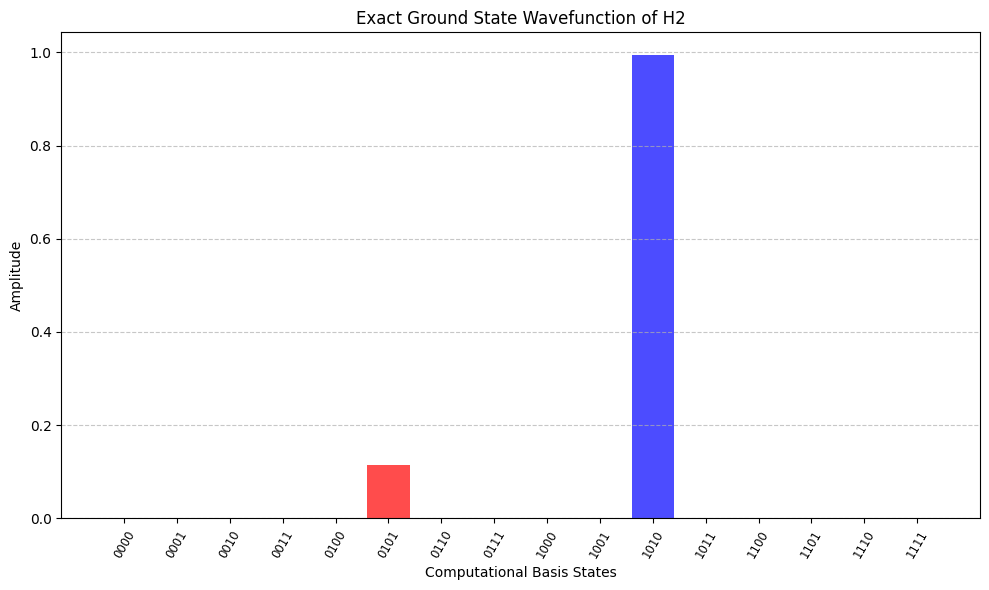

In [48]:
# Create a bar plot of the ground state wavefunction components
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Normalize the sign of the vector for better visualization
i_max = np.argmax(np.abs(ground_state_vector))
state = ground_state_vector * np.sign(ground_state_vector[i_max])

# Plot the amplitude of each basis state
ax.bar(range(len(state)), np.abs(state), 
       color=(np.real(state) > 0).choose(['r','b']),
       alpha=0.7)

# Label the x-axis with binary representations of basis states
plt.xticks(range(len(state)), [f"{i:04b}" for i in range(len(state))], 
           size='small', rotation=60)

# Add labels and title
plt.xlabel('Computational Basis States')
plt.ylabel('Amplitude')
plt.title('Exact Ground State Wavefunction of H2')

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display
plt.tight_layout()

display(Markdown('''
**Ground State Wavefunction Visualization:**
- Each bar represents the amplitude of a computational basis state in the ground state
- The x-axis shows the binary representation of each basis state (e.g., '0101')
- Red bars indicate positive coefficients, blue bars indicate negative coefficients
- The dominant states tell us about the electronic configuration in the ground state
- In the H2 ground state, you should observe significant contributions from a small number of basis states
'''))

Notebook by **Maxime Dion** <maxime.dion@usherbrooke.ca><br>
For the QSciTech-QuantumBC virtual workshop on gate-based quantum computing